In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D


In [4]:
# Définir les signatures des fonctions Rust
regression_model = ctypes.CDLL('modele/linear_regression/target/release/libregression_model.so')

regression_model.LR_init.restype = ctypes.POINTER(ctypes.c_void_p)
regression_model.LR_train.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t,
    ctypes.c_size_t
]
regression_model.LR_predict.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t,
    ctypes.c_size_t,
    ctypes.POINTER(ctypes.c_double)
]
regression_model.LR_free.argtypes = [ctypes.POINTER(ctypes.c_void_p)]


Prédictions : [1.6 3.2]


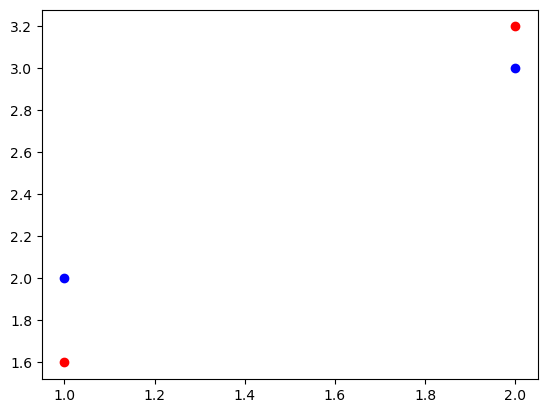

<Figure size 640x480 with 0 Axes>

In [5]:

model = regression_model.LR_init()

X = np.array([
      [1],
      [2]
], dtype=np.float64)

y = np.array([
   [2.0],
    [3.0],  
], dtype=np.float64)

regression_model.LR_train(
    model,
    X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    X.shape[0],
    X.shape[1]
)


predictions = np.zeros(X.shape[0])
regression_model.LR_predict(
    model,
    X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    X.shape[0],
    X.shape[1],
    predictions.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
)

# Afficher les résultats
print("Prédictions :", predictions)

# Libérer le modèle
regression_model.LR_free(model)

plt.scatter(X, y, color='blue')
plt.scatter(X, predictions, color='red')
plt.show()
plt.clf()


Prédictions : [1.6 3.2 2.5]


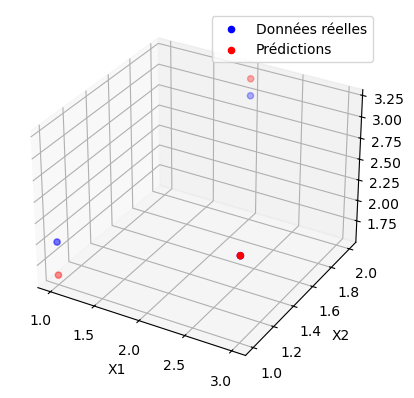

<Figure size 640x480 with 0 Axes>

In [6]:

model = regression_model.LR_init()

X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
], dtype=np.float64)

y = np.array([
   2.0,
    3.0,  
    2.5,  
], dtype=np.float64)
    
regression_model.LR_train(
    model,
    X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    X.shape[0],
    X.shape[1]
)


predictions = np.zeros(X.shape[0])
regression_model.LR_predict(
    model,
    X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    X.shape[0],
    X.shape[1],
    predictions.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
)

# Afficher les résultats
print("Prédictions :", predictions)

# Libérer le modèle
regression_model.LR_free(model)

# plt.scatter(X, y, color='blue')
# plt.scatter(X, predictions, color='red')
# plt.show()
# plt.clf()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Données réelles')
ax.scatter(X[:, 0], X[:, 1], predictions, color='red', label='Prédictions')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.legend()
plt.show()
plt.clf()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Prédictions : [1. 2. 3.]


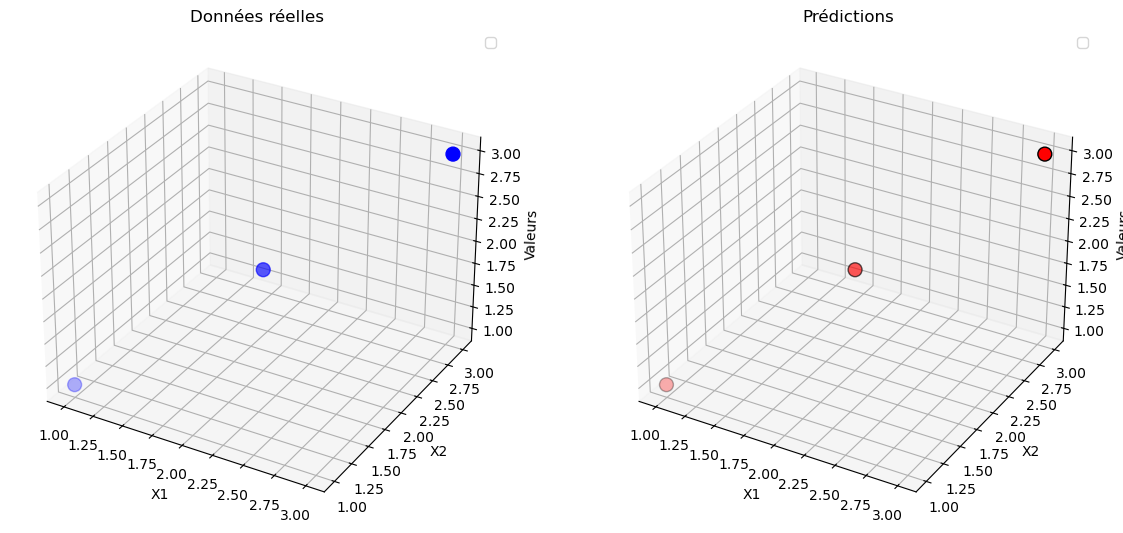

In [9]:

model = regression_model.LR_init()

X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
], dtype=np.float64)

y = np.array([
    1,
    2,
    3  
], dtype=np.float64)
    
regression_model.LR_train(
    model,
    X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    X.shape[0],
    X.shape[1]
)


predictions = np.zeros(X.shape[0])
regression_model.LR_predict(
    model,
    X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    X.shape[0],
    X.shape[1],
    predictions.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
)

# Afficher les résultats
print("Prédictions :", predictions)

# Libérer le modèle
regression_model.LR_free(model)

# plt.scatter(X, y, color='blue')
# plt.scatter(X, predictions, color='red')
# plt.show()
# plt.clf()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Données réelles')
# ax.scatter(X[:, 0], X[:, 1], predictions, color='red', label='Prédictions')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# plt.legend()
# plt.show()
# plt.clf()

fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y,s=100, color='blue')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Valeurs')
ax1.set_title('Données réelles')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], predictions, color='red', edgecolor='k', s=100, marker='o')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Valeurs')
ax2.set_title('Prédictions')
ax2.legend()

plt.show()


Prédictions : [ 0.33333333 -0.66666667 -0.33333333  0.        ]


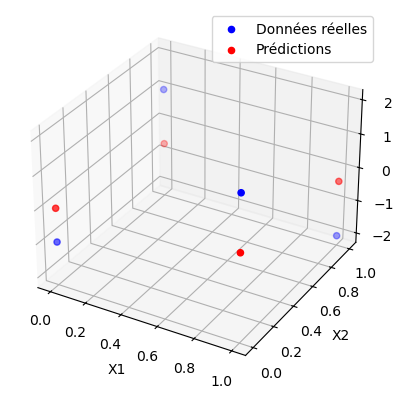

<Figure size 640x480 with 0 Axes>

In [8]:

model = regression_model.LR_init()

X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
], dtype=np.float64)

y = np.array([
    2,
    1,
    -2,
    -1 
], dtype=np.float64)
    
regression_model.LR_train(
    model,
    X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    X.shape[0],
    X.shape[1]
)


predictions = np.zeros(X.shape[0])
regression_model.LR_predict(
    model,
    X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    X.shape[0],
    X.shape[1],
    predictions.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
)

# Afficher les résultats
print("Prédictions :", predictions)

# Libérer le modèle
regression_model.LR_free(model)

# plt.scatter(X, y, color='blue')
# plt.scatter(X, predictions, color='red')
# plt.show()
# plt.clf()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Données réelles')
ax.scatter(X[:, 0], X[:, 1], predictions, color='red', label='Prédictions')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.legend()
plt.show()
plt.clf()
